<a href="https://colab.research.google.com/github/Anmolsharma425/cat_vs_dog_classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:05<00:00, 149MB/s]
100% 1.06G/1.06G [00:05<00:00, 210MB/s]


In [5]:
!unzip -q /content/dogs-vs-cats.zip -d destination_folder

Libraries

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [ ]:
def plot_image_from_directory(directory_path, class_animal, num_images= 9):
  image_filenames = os.listdir(directory_path)

  # No of image is less then required
  if len(image_filenames) < num_images:
    print(f"Only found {len(image_filenames)} images in the {directory_path}, displaying all of them.")
    num_images = len(image_filenames)

  # Randomly select num_images from the directory
  selected_images = random.sample(image_filenames, num_images)

  fig, axes = plt.subplots(3, 3, figsize= (10, 10))
  axes = axes.ravel()

  for i, image_file in enumerate(selected_images):
    image_path = os.path.join(directory_path, image_file)
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Image : {class_animal}")
    axes[i].axis("off")

  plt.tight_layout()
  plt.show()


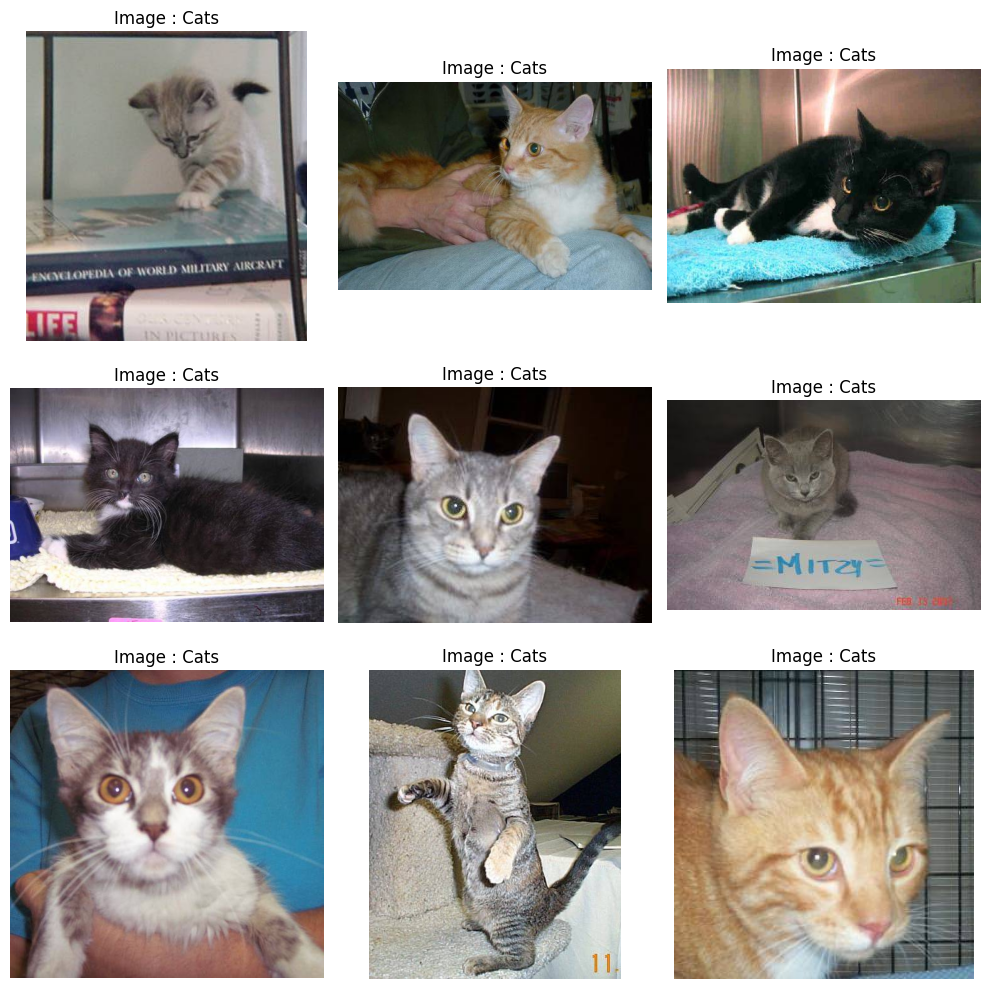

In [ ]:
cat_dir = "/content/train/cats"
plot_image_from_directory(cat_dir, "Cats")

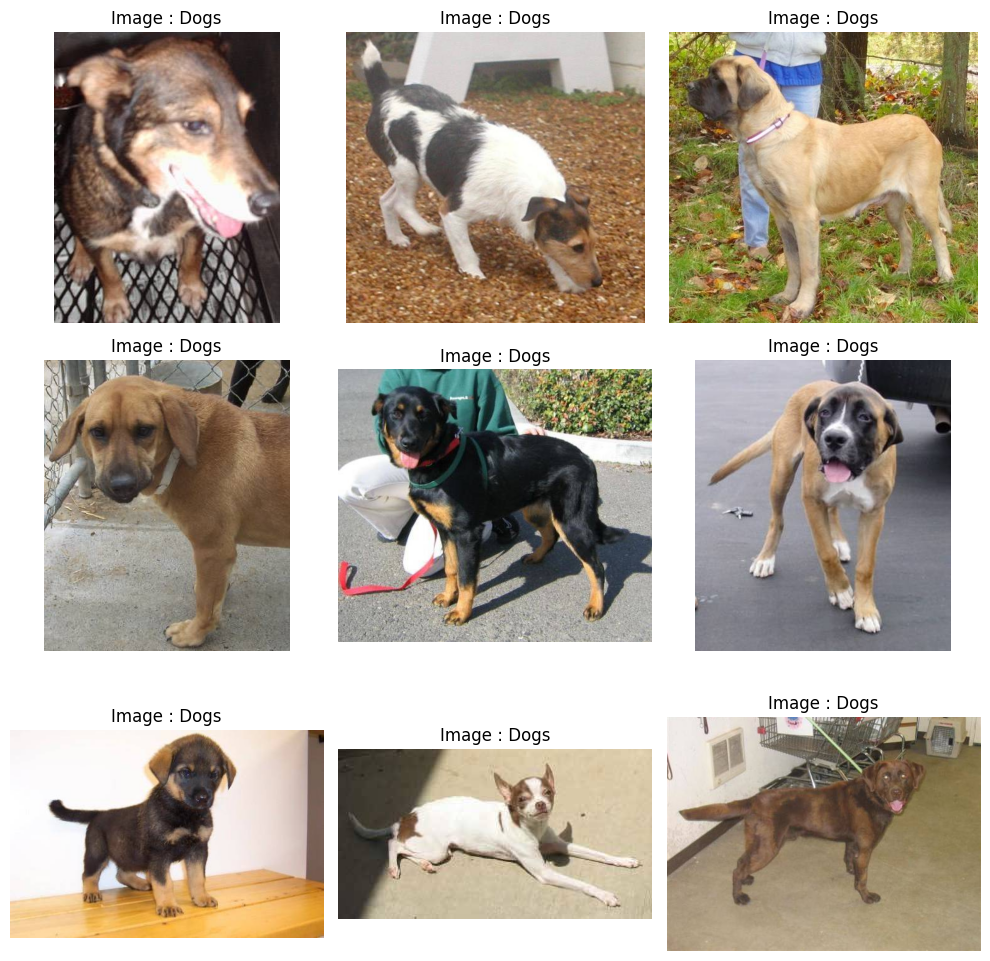

In [ ]:
dog_dir = "/content/train/dogs"
plot_image_from_directory(dog_dir, "Dogs")

In [ ]:
cat_images = os.listdir(cat_dir)
dog_images = os.listdir(dog_dir)

classes_animals = ['Cats', 'Dogs']
count = [len(cat_images), len(dog_images)]

print(count)

[10000, 10000]


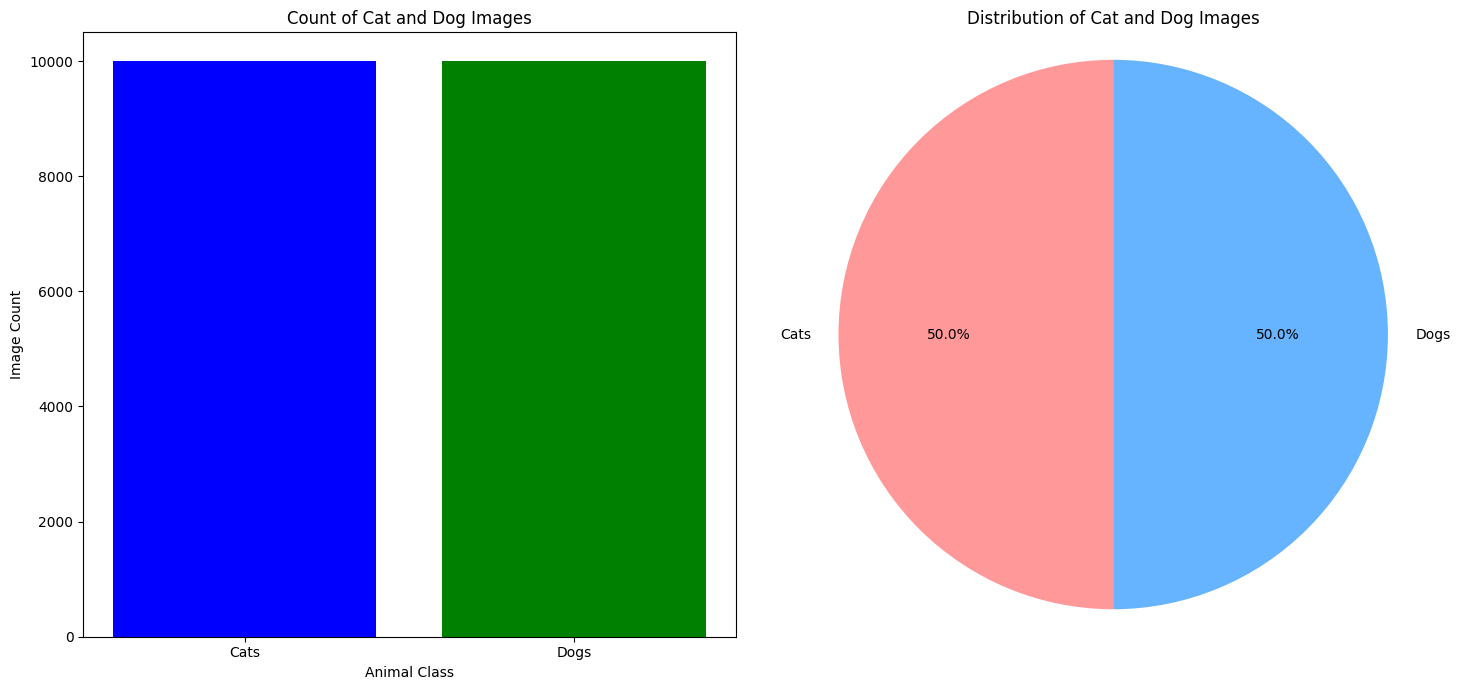

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import imghdr

image_exts = ['jpeg', 'jpg', 'png']

data_dir = '/content/dogs_vs_cats'

# Walk through all directories and files in the dataset
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # Construct the path to the current file
        file_path = os.path.join(root, file)

        try:
            # Check the file type of the current file
            file_type = imghdr.what(file_path)

            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
            else:
                img = cv2.imread(file_path)

        except Exception as e:
            print(f'Issue with file {file_path}. Error: {e}')
            os.remove(file_path)

In [ ]:
import numpy as np
from PIL import Image

def image_array(image_path):
  try:
    with Image.open(image_path) as img:
      image_arr = np.array(img)
      return image_arr
  except IOError:
    print(f"Error opening image: {image_path}")
    return None

array([[[ 39,  44,  40],
        [ 39,  44,  40],
        [ 40,  44,  43],
        ...,
        [207, 204, 173],
        [202, 199, 166],
        [201, 198, 163]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [203, 200, 169],
        [199, 196, 163],
        [197, 194, 159]],

       [[ 40,  45,  41],
        [ 40,  45,  41],
        [ 40,  44,  43],
        ...,
        [199, 195, 166],
        [199, 194, 164],
        [199, 194, 162]],

       ...,

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 36,  23,  17],
        [ 41,  30,  24],
        [ 57,  46,  40]],

       [[ 32,  30,  31],
        [ 30,  28,  29],
        [ 26,  24,  25],
        ...,
        [ 42,  29,  21],
        [ 44,  34,  25],
        [ 55,  45,  36]],

       [[ 32,  30,  31],
        [ 29,  27,  28],
        [ 25,  23,  24],
        ...,
        [ 51,  38,  30],
        [ 42,  32,  23],
        [ 40,  30,  21]]], dtype=uint8)
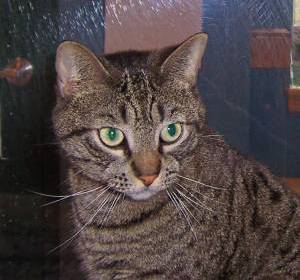

In [ ]:
image_array("/content/train/cats/cat.1.jpg")

In [ ]:
image = '/content/train/cats/cat.1.jpg'

import cv2
img = cv2.imread(image)

if image is not None:
  print(img)
  print(img.shape)
else:
  print("Image is None")

[[[ 40  44  39]
  [ 40  44  39]
  [ 43  44  40]
  ...
  [173 204 207]
  [166 199 202]
  [163 198 201]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [169 200 203]
  [163 196 199]
  [159 194 197]]

 [[ 41  45  40]
  [ 41  45  40]
  [ 43  44  40]
  ...
  [166 195 199]
  [164 194 199]
  [162 194 199]]

 ...

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 17  23  36]
  [ 24  30  41]
  [ 40  46  57]]

 [[ 31  30  32]
  [ 29  28  30]
  [ 25  24  26]
  ...
  [ 21  29  42]
  [ 25  34  44]
  [ 36  45  55]]

 [[ 31  30  32]
  [ 28  27  29]
  [ 24  23  25]
  ...
  [ 30  38  51]
  [ 23  32  42]
  [ 21  30  40]]]
(280, 300, 3)


In [ ]:
base_dir = "/content/dogs_vs_cats/train"

train_data = ImageDataGenerator(rescale= 1./255, validation_split= 0.2)
train_generator = train_data.flow_from_directory(
    base_dir,
    target_size= (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = train_data.flow_from_directory(
    base_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    subset = 'validation'
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
train_class_labels = train_generator.class_indices
print("Training class label: ", train_class_labels)

validation_class_labels = validation_generator.class_indices
print("Validation class label: ", validation_class_labels)

Training class label:  {'cats': 0, 'dogs': 1}
Validation class label:  {'cats': 0, 'dogs': 1}


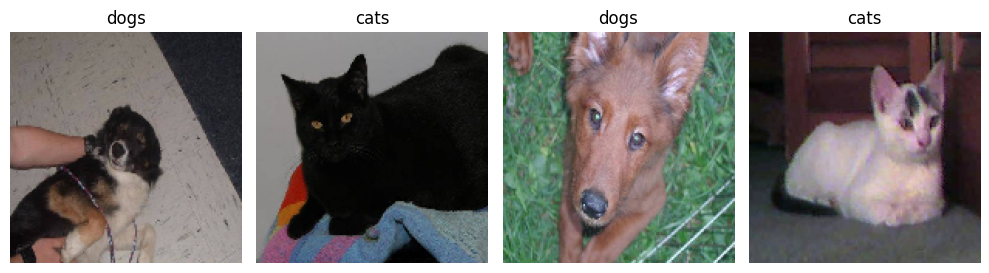

In [ ]:
import matplotlib.pyplot as plt

# function to plot image with their label
def plot_image(generator, num_img = 4):
  images, labels = next(generator)

  fig, axes = plt.subplots(1, num_img, figsize= (10, 10))
  axes = axes.ravel()

  for image, label, ax in zip(images, labels, axes):
    ax.imshow(image)
    #inverse the class label to class name
    class_labels = dict((v, k) for k, v in generator.class_indices.items())
    ax.set_title(class_labels[int(label)])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

# image generation
plot_image(train_generator)

In [ ]:
train_generator.reset()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

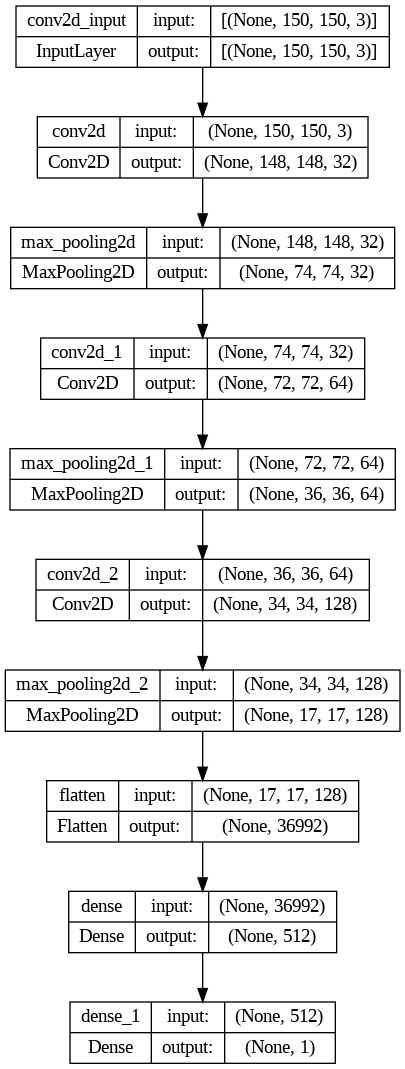

In [ ]:
plot_model(model, show_shapes= True, show_layer_names= True, to_file= 'cnn_mode.png')

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
batch_size = 20
train_steps = np.ceil(train_generator.samples / batch_size)
validation_steps = np.ceil(validation_generator.samples / batch_size)

print("Train steps: ", train_steps)
print("Validation steps: ", validation_steps)

Train steps:  800.0
Validation steps:  200.0


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_steps,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_steps
)

Epoch 1/10
800/800 [==============================] - 41s 43ms/step - loss: 0.6450 - accuracy: 0.6134 - val_loss: 0.6042 - val_accuracy: 0.6727
Epoch 2/10
800/800 [==============================] - 35s 43ms/step - loss: 0.5211 - accuracy: 0.7460 - val_loss: 0.4932 - val_accuracy: 0.7657
Epoch 3/10
800/800 [==============================] - 35s 44ms/step - loss: 0.4451 - accuracy: 0.7941 - val_loss: 0.4572 - val_accuracy: 0.7897
Epoch 4/10
800/800 [==============================] - 34s 43ms/step - loss: 0.3656 - accuracy: 0.8361 - val_loss: 0.4246 - val_accuracy: 0.8130
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.2652 - accuracy: 0.8864 - val_loss: 0.4434 - val_accuracy: 0.8100
Epoch 6/10
800/800 [==============================] - 35s 43ms/step - loss: 0.1436 - accuracy: 0.9445 - val_loss: 0.6422 - val_accuracy: 0.8002
Epoch 7/10
800/800 [==============================] - 36s 45ms/step - loss: 0.0692 - accuracy: 0.9762 - val_loss: 0.7418 - val_accuracy:

In [ ]:
history.history

{'loss': [0.6450298428535461,
  0.5210909843444824,
  0.4451349675655365,
  0.3656449019908905,
  0.26522096991539,
  0.14357689023017883,
  0.06917168200016022,
  0.04678976908326149,
  0.028778452426195145,
  0.027983905747532845],
 'accuracy': [0.6133750081062317,
  0.7459999918937683,
  0.7940624952316284,
  0.8361250162124634,
  0.8864374756813049,
  0.9445000290870667,
  0.9762499928474426,
  0.9839375019073486,
  0.9898750185966492,
  0.9908124804496765],
 'val_loss': [0.6041771173477173,
  0.4931950569152832,
  0.45717552304267883,
  0.4245680570602417,
  0.4434460699558258,
  0.6422293186187744,
  0.7418285608291626,
  1.0174486637115479,
  1.051748514175415,
  1.3289737701416016],
 'val_accuracy': [0.6727499961853027,
  0.765749990940094,
  0.7897499799728394,
  0.8130000233650208,
  0.8100000023841858,
  0.8002499938011169,
  0.8004999756813049,
  0.7935000061988831,
  0.768750011920929,
  0.7862499952316284]}

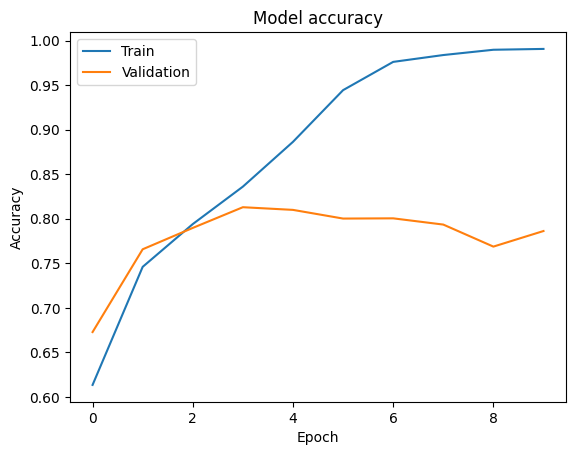

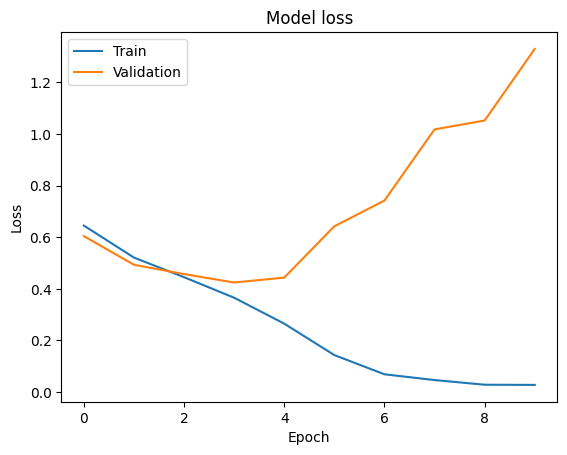

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Model Evaluation

In [ ]:
test_data = ImageDataGenerator(rescale= 1./255)
test_dir = '/content/dogs_vs_cats/test'
test_generator = test_data.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
    shuffle = False)

Found 5000 images belonging to 2 classes.


In [ ]:
test_generator.reset()

true_labels = test_generator.classes
probability = model.predict(test_generator, steps = np.ceil(test_generator.samples/test_generator.batch_size))

predicted_classes = (probability > 0.5).astype(int).squeeze()
class_labels = list(test_generator.class_indices.keys())
print("True labels: ", true_labels)
print("Predicted labels: ", predicted_classes)

250/250 [==============================] - 8s 32ms/step
True labels:  [0 0 0 ... 1 1 1]
Predicted labels:  [0 0 0 ... 1 0 0]


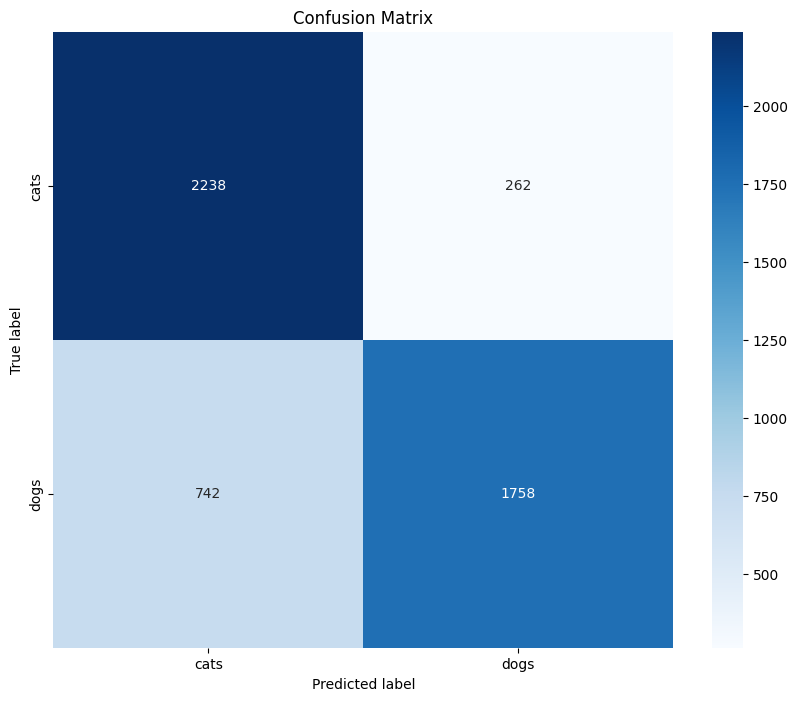

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 8s 33ms/step - loss: 1.2941 - accuracy: 0.7992
Test accuracy: 79.92%
Test loss: 1.29


Single Image Prediction

In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 350ms/step
Prediction: [[1.968317e-27]]


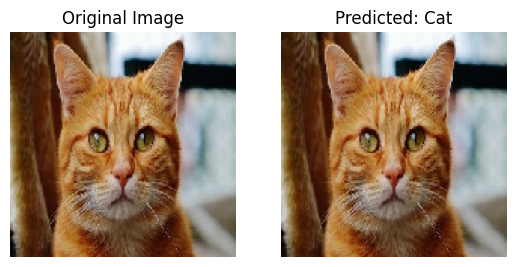

In [ ]:
# Load and preprocess the image
img_path = '/content/download.jpeg'
make_prediction(img_path)

1/1 [==============================] - 0s 18ms/step
Prediction: [[0.9846964]]


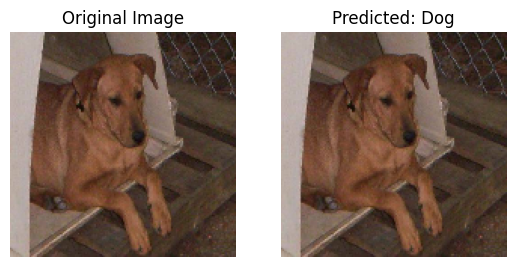

In [ ]:
# Load and preprocess the image
img_path = '/content/dogs_vs_cats/test/dogs/dog.100.jpg'
make_prediction(img_path)

250/250 [==============================] - 9s 34ms/step
Total misclassifications: 1004


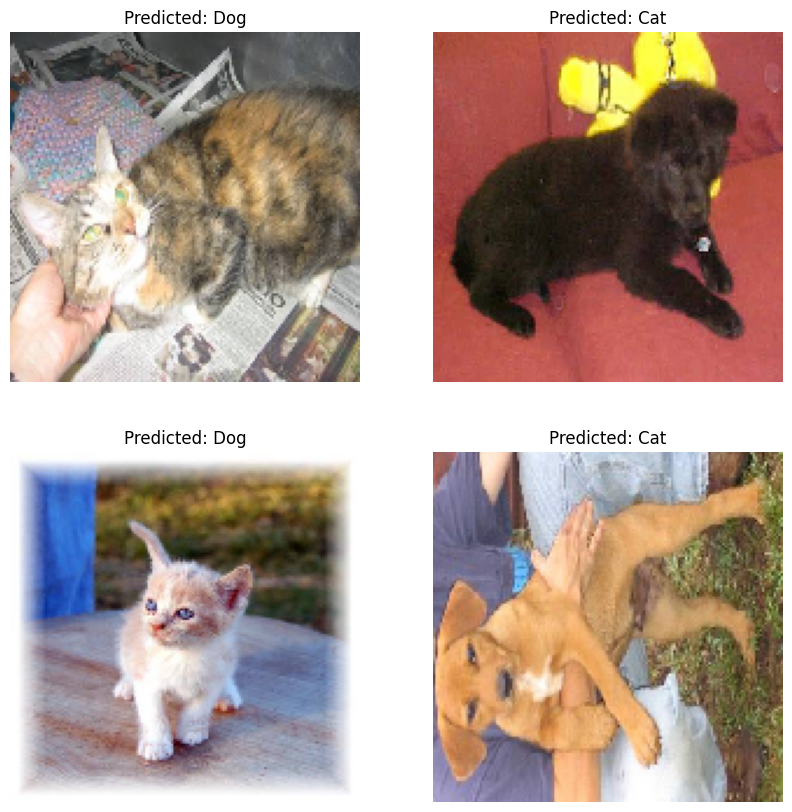

In [ ]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5

# Retrieve the true labels from the generator
true_classes = test_generator.classes

# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

Visualize the kernel feature

In [ ]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)


In [ ]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [ ]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

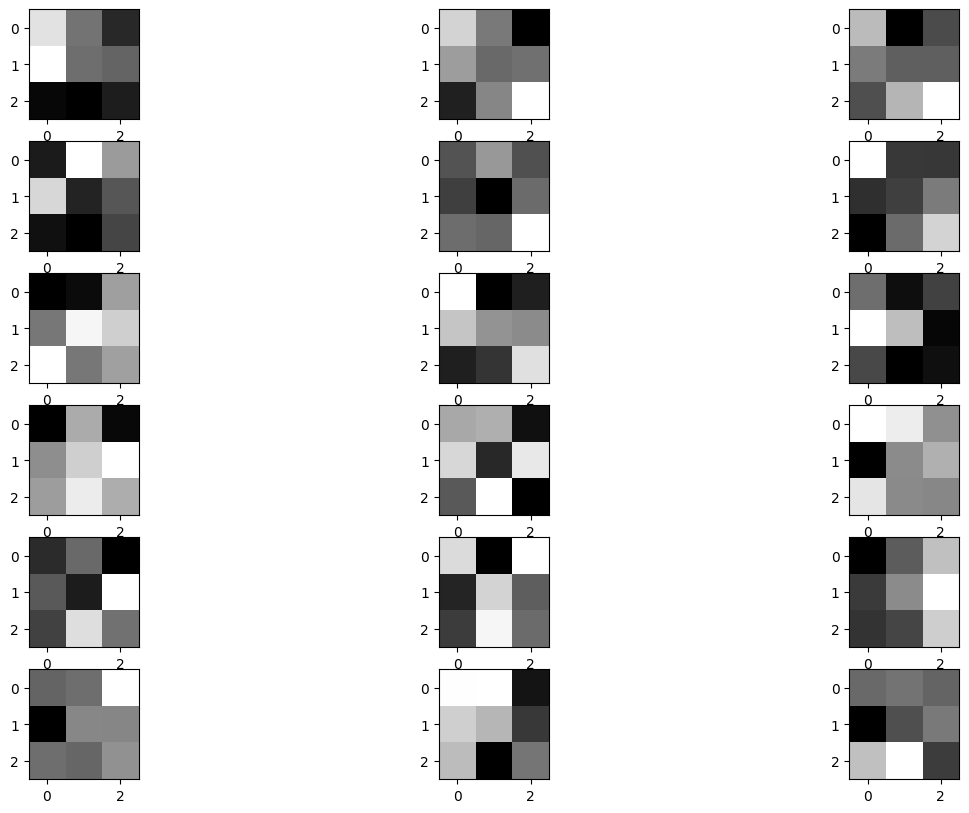

In [ ]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 [==============================] - 0s 37ms/step


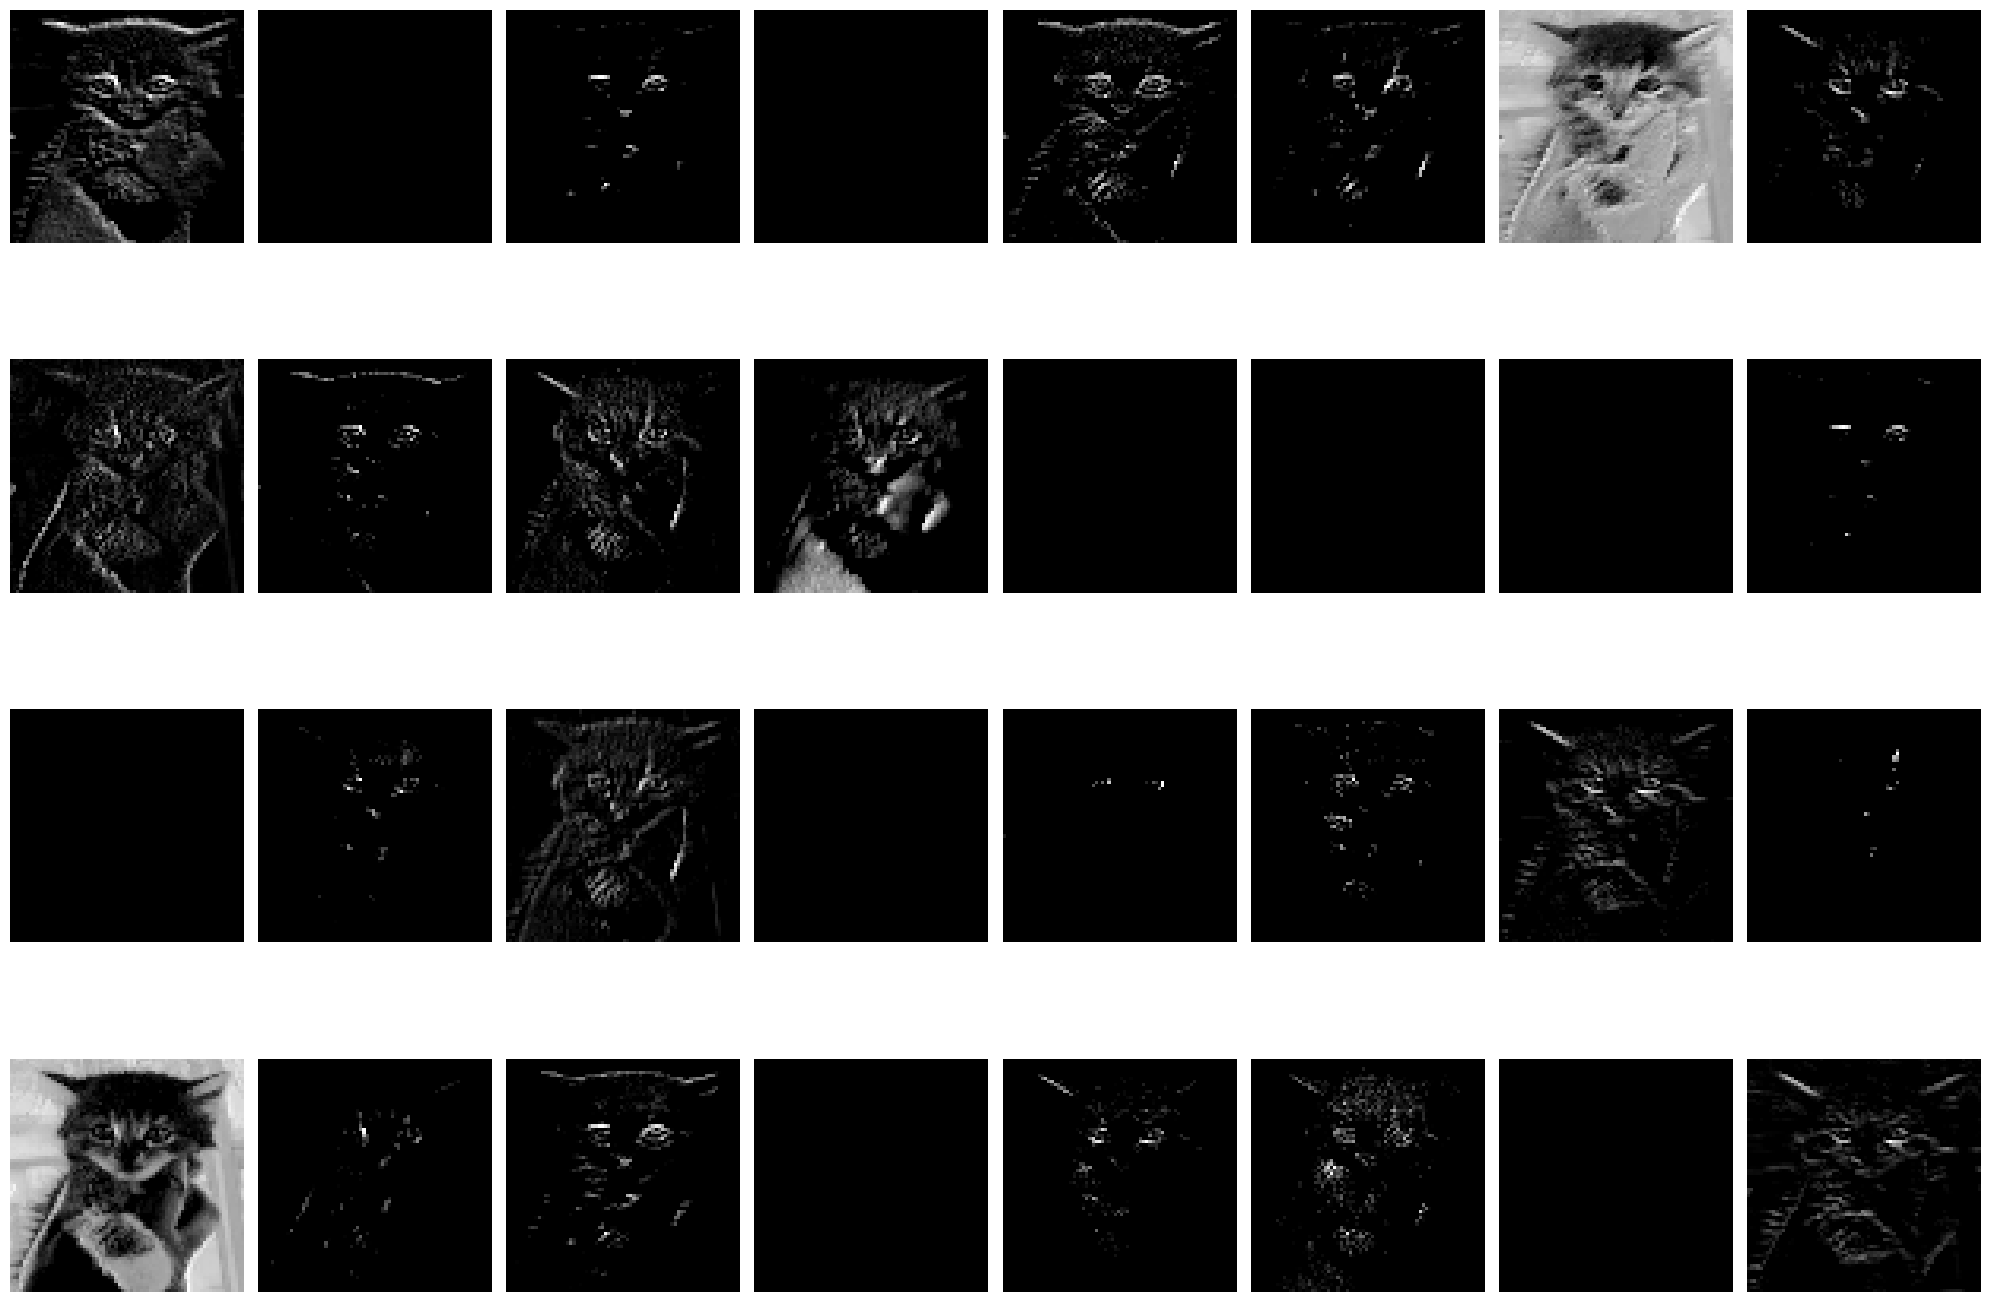

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()